In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import tkinter as tk
from PIL import Image, ImageTk

In [4]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))   

In [5]:
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = './sam_vit_b_01ec64.pth'
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

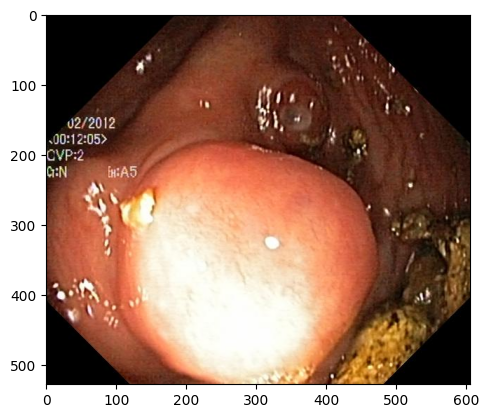

In [6]:
image = cv2.imread('/media/rohit/mirlproject2/fetal head circumference/1segmented-images/val/imgs/e3102083-224a-4d1d-acee-9c67901c3c78.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [7]:
predictor.set_image(image)

In [8]:
points = []

def click_event(event):
    global img, tk_img, points
    x, y = event.x, event.y
    points.append([x, y])
    print(f'Coordinates: x={x}, y={y}')
    cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)
    tk_img = ImageTk.PhotoImage(img_pil)
    label.config(image=tk_img)

root = tk.Tk()

img=image.copy()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_pil = Image.fromarray(img_rgb)
tk_img = ImageTk.PhotoImage(img_pil)

label = tk.Label(root, image=tk_img)
label.pack()

label.bind('<Button-1>', click_event)

root.mainloop()

Coordinates: x=241, y=311
Coordinates: x=378, y=359
Coordinates: x=437, y=167


In [9]:
points

[[241, 311], [378, 359], [437, 167]]

In [10]:
input_point = np.array(points)
len_points=len(input_point)
#input_label = np.array(len_points*[1])
input_label = np.array([1,1,0])

print(len_points)
print(input_label)

3
[1 1 0]


In [11]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

In [12]:
mask_input = logits[np.argmax(scores), :, :]

In [13]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=mask_input[None, :, :],
    multimask_output=False,
)

In [14]:
masks.shape

(1, 528, 605)

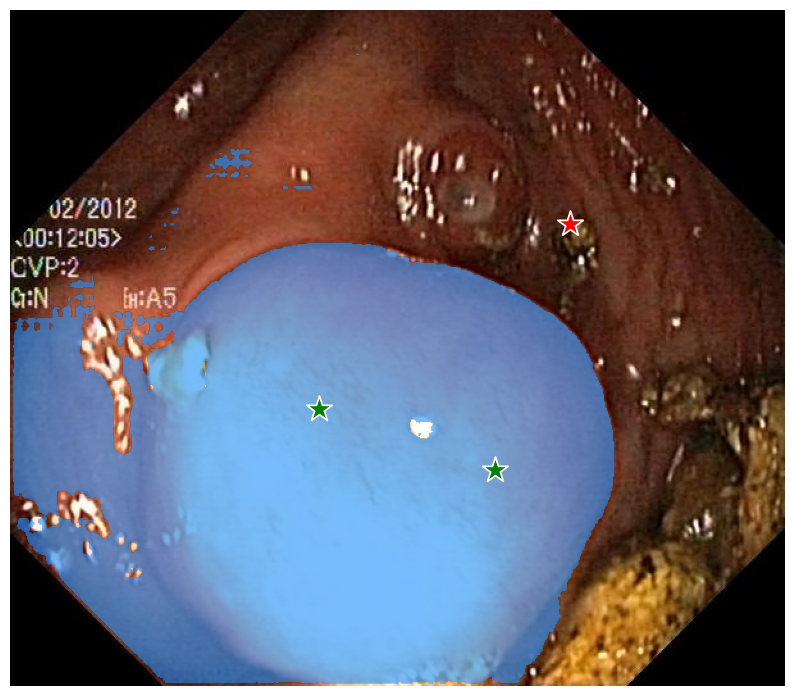

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show() 

In [29]:
masks[0].shape

(528, 605)

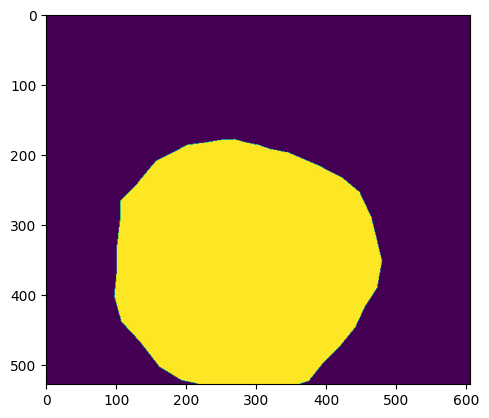

In [23]:
original_mask = cv2.imread('/media/rohit/mirlproject2/fetal head circumference/1segmented-images/val/masks/e3102083-224a-4d1d-acee-9c67901c3c78.jpg')
original_mask = cv2.cvtColor(original_mask, cv2.COLOR_BGR2GRAY)
plt.imshow(original_mask)

In [24]:
original_mask.shape

(528, 605)

In [28]:
original_mask.shape

(528, 605)